# QRBM plots



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import time
import multiprocessing as mp
import math
from numpy import log, sqrt, exp
import sys
from scipy.optimize import curve_fit as fit
from ast import literal_eval
from math import floor

import netket as nk

# Compare performances

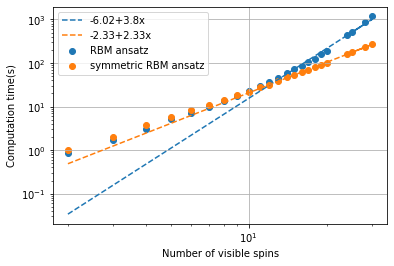

In [258]:
# Load data
par = np.loadtxt("data/performance.txt")
par = par.T



# Define the fit function
def f(x,a,b):
	return a+b*x

# Linear fit
fit_rbm = fit(f, log(par[0][10::]), log(par[1][10::]))[0]
fit_srbm = fit(f, log(par[0][10::]), log(par[2][10::]))[0]

# Plot
plt.ylabel("Computation time(s)")
plt.xlabel("Number of visible spins")
plt.loglog()

plt.scatter(par[0],par[1], label="RBM ansatz")
plt.plot(par[0], exp(f(log(par[0]),fit_rbm[0], fit_rbm[1])),'--', label=str(round(fit_rbm[0],2))+"+"+str(round(fit_rbm[1],2))+"x")

plt.scatter(par[0],par[2], label="symmetric RBM ansatz")
plt.plot(par[0], exp(f(log(par[0]),fit_srbm[0], round(fit_srbm[1],2))),'--',label=str(round(fit_srbm[0],2))+"+"+str(round(fit_srbm[1],2))+"x")

plt.legend()
plt.grid(b=True)



plt.show()


# Exact  diagonalization with NetKet

In [27]:
# Load parameters of latest simualation
par = np.loadtxt("temp/parameters.txt")


Nv = int(par[0])
model = int(par[3])
h = float(par[4])
steps = int(par[2])
alpha = int(par[1])




# Define graph
g = nk.graph.Hypercube(length= Nv , n_dim =1 , pbc=True)

# Define Hilbert space

hi = nk.hilbert.Spin(  s = 0.5, N = g.n_nodes)

# Define Ising Hamiltonian

if int(model)==0:
	op = nk.operator.Heisenberg(hilbert=hi, graph = g)
elif int(model)==1:
	op = nk.operator.Ising(hilbert=hi, h = h, graph = g)	
else:
	print("unspecified model")
	sys.exit()


# Exact diagonalization
start = time.time()
res = nk.exact.lanczos_ed(op, compute_eigenvectors = False)
stop = time.time()


print("Expected ground state energy (ED)", res[0])

Expected ground state energy (ED) -39.14752260706274


ED computation time (s): 70.13755083084106


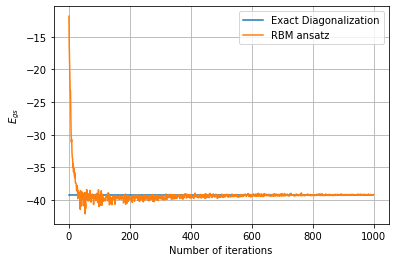

In [39]:
### Printing


# Load energy
E = np.loadtxt("data/ground_state.txt")
E_true = [res[0]]*steps

x = list(range(steps))

plt.ylabel("$E_{gs}$")
plt.xlabel("Number of iterations")
#plt.xscale("log")
print("ED computation time (s): "+ str(stop-start))
plt.plot(x,E_true, label = "Exact Diagonalization")
plt.plot(x, E, label = "RBM ansatz")
plt.legend()
plt.grid(b=True)



plt.show()

# Non symmetric RBM
    

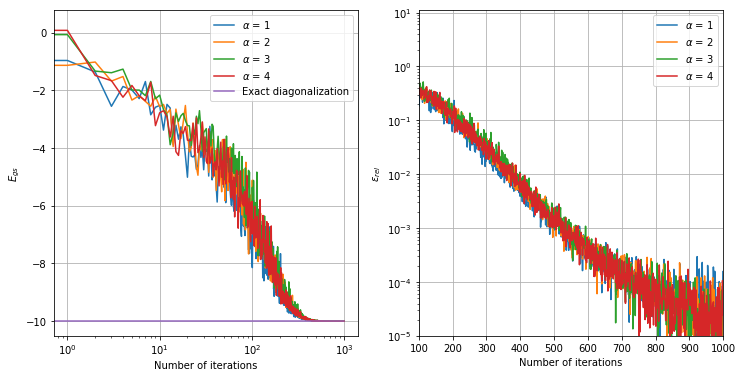

In [103]:
Nv = 10
model = 1
h = 0.0
steps = 1000



# Load energies
E1 = np.loadtxt("data/E_ISING_0_10_1_1000.txt")
E2 = np.loadtxt("data/E_ISING_0_10_2_1000.txt")
E3 = np.loadtxt("data/E_ISING_0_10_3_1000.txt")
E4 = np.loadtxt("data/E_ISING_0_10_4_1000.txt")

E_true = np.array([-10]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("$\\epsilon_{rel}$")
#ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylim(10**(-5))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)




fig.savefig("Figure_E_ISING_0_10_1000.png")
plt.show()


# Symmetric RBM

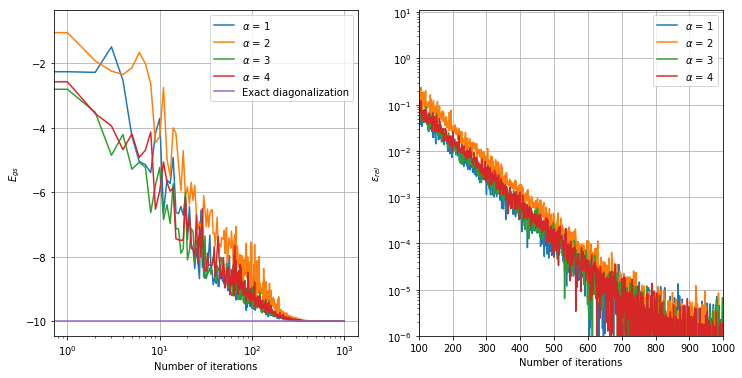

In [101]:
Nv = 10
model = 1
h = 0.0
steps = 1000



# Load energies
E1 = np.loadtxt("data/ES_ISING_0_10_1_1000.txt")
E2 = np.loadtxt("data/ES_ISING_0_10_2_1000.txt")
E3 = np.loadtxt("data/ES_ISING_0_10_3_1000.txt")
E4 = np.loadtxt("data/ES_ISING_0_10_4_1000.txt")

E_true = np.array([-10]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("$\\epsilon_{rel}$")
#ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylim(10**(-6))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_0_10_1000.png")
plt.show()


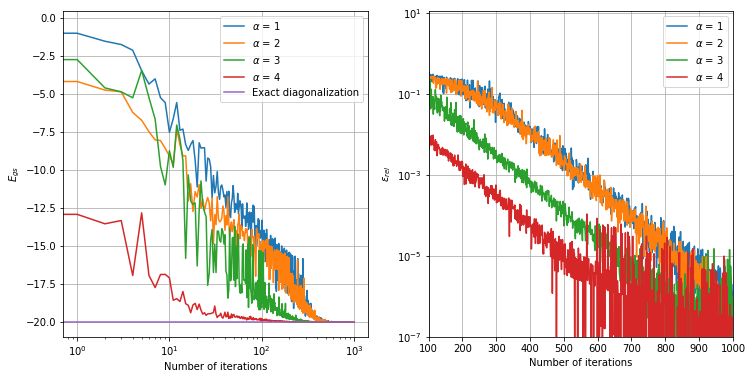

In [35]:
Nv = 20
model = 1
h = 0.0
steps = 1000
# lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_ISING_0_20_1_1000.txt")
E2 = np.loadtxt("data/ES_ISING_0_20_2_1000.txt")
E3 = np.loadtxt("data/ES_ISING_0_20_3_1000.txt")
E4 = np.loadtxt("data/ES_ISING_0_20_4_1000.txt")

E_true = np.array([-Nv]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("$\\epsilon_{rel}$")
#ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylim(10**(-7))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)


fig.savefig("Figure_ES_ISING_0_20_1000.png")
plt.show()

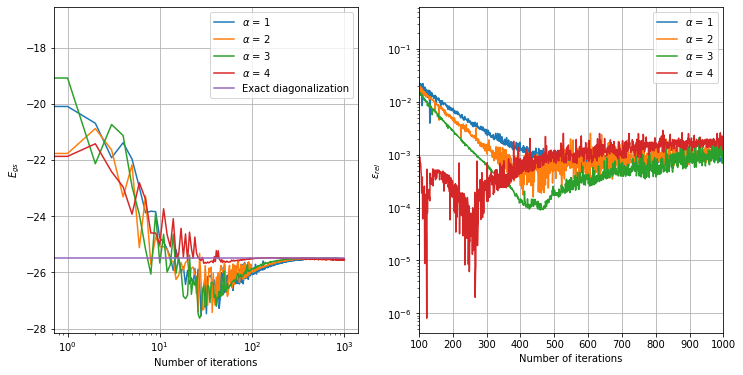

In [98]:

Nv = 20
model = 1
h = 1.0
steps = 1000
# lr = 0.01


# Load energies
E1 = np.loadtxt("data/ES_ISING_1_20_1_1000.txt")
E2 = np.loadtxt("data/ES_ISING_1_20_2_1000.txt")
E3 = np.loadtxt("data/ES_ISING_1_20_3_1000.txt")
E4 = np.loadtxt("data/ES_ISING_1_20_4_1000.txt")

E_true =np.array([-25.490989686]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("$\\epsilon_{rel}$")
#ax[1].set_xscale("log")
ax[1].set_yscale("log")
#ax[1].set_ylim(10**(-6))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_1_20_1000.png")
plt.show()


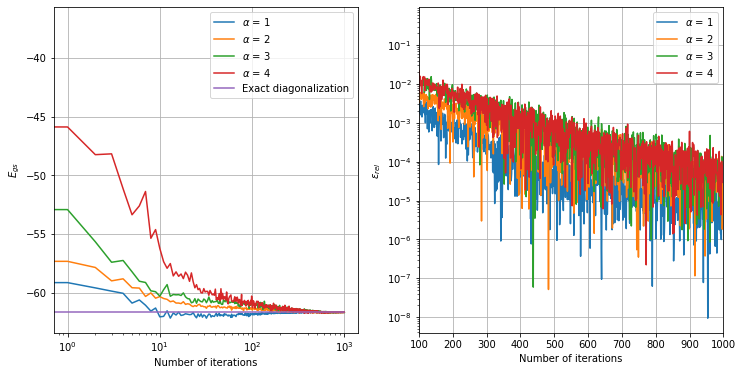

In [97]:
Nv = 20
model = 1
h = 3.0
steps = 1000
#lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_ISING_3_20_1_1000.txt")
E2 = np.loadtxt("data/ES_ISING_3_20_2_1000.txt")
E3 = np.loadtxt("data/ES_ISING_3_20_3_1000.txt")
E4 = np.loadtxt("data/ES_ISING_3_20_4_1000.txt")

E_true =np.array([-61.67857700770639]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("$\\epsilon_{rel}$")
#ax[1].set_xscale("log")
ax[1].set_yscale("log")
#ax[1].set_ylim(10**(-6))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_3_20_1000.png")
plt.show()


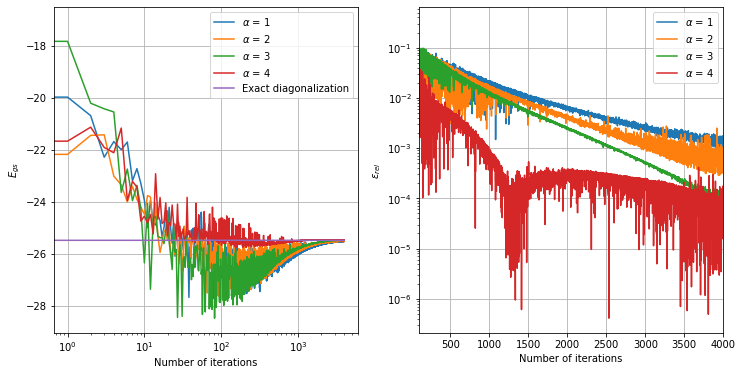

In [95]:
Nv = 20
model = 1
h = 1.0
steps = 4000
#lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_ISING_1_20_1_4000.txt")
E2 = np.loadtxt("data/ES_ISING_1_20_2_4000.txt")
E3 = np.loadtxt("data/ES_ISING_1_20_3_4000.txt")
E4 = np.loadtxt("data/ES_ISING_1_20_4_4000.txt")

E_true =np.array([-25.490989686]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
#ax[1].set_xscale("log")
ax[1].set_ylabel("$\\epsilon_{rel}$")
ax[1].set_yscale("log")
#ax[1].set_ylim(10**(-6))
ax[1].set_xlim(10**2,4*10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_1_20_4000.png")
plt.show()


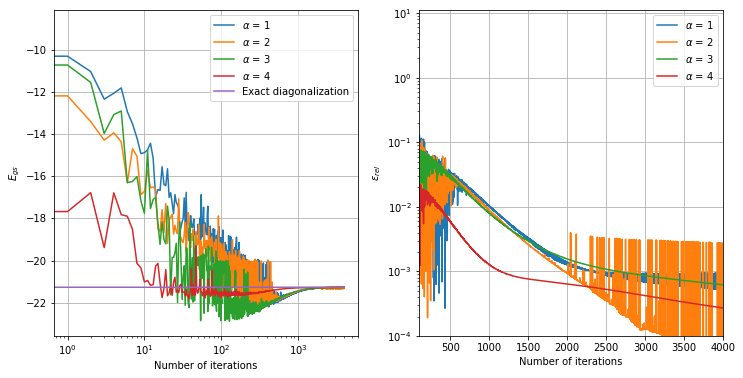

In [195]:
Nv = 20
model = 1
h = 0.5
steps = 4000
#lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_ISING_0.5_20_1_4000.txt")
E2 = np.loadtxt("data/ES_ISING_0.5_20_2_4000.txt")
E3 = np.loadtxt("data/ES_ISING_0.5_20_3_4000.txt")
E4 = np.loadtxt("data/ES_ISING_0.5_20_4_4000.txt")

E_true =np.array([-21.270888306919346]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
#ax[1].set_xscale("log")
ax[1].set_ylabel("$\\epsilon_{rel}$")
ax[1].set_yscale("log")
ax[1].set_ylim(10**(-4))
ax[1].set_xlim(10**2,4*10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_0.5_20_4000.png")
plt.show()


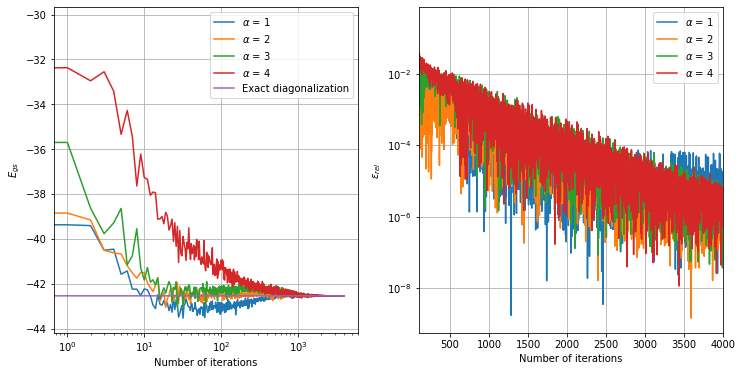

In [239]:
Nv = 20
model = 1
h = 2
steps = 4000
#lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_ISING_2_20_1_4000.txt")
E2 = np.loadtxt("data/ES_ISING_2_20_2_4000.txt")
E3 = np.loadtxt("data/ES_ISING_2_20_3_4000.txt")
E4 = np.loadtxt("data/ES_ISING_2_20_4_4000.txt")

E_true =np.array([-42.54177661383856]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
#ax[1].set_xscale("log")
ax[1].set_ylabel("$\\epsilon_{rel}$")
ax[1].set_yscale("log")
#ax[1].set_ylim(10**(-7))
ax[1].set_xlim(10**2,4*10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_ISING_2_20_4000.png")
plt.show()


# Precision calculation

0.0017446293189713456 data/ES_ISING_0.5_20_1_4000.txt
0.0012791882420569054 data/ES_ISING_0.5_20_2_4000.txt
0.0017291595039300141 data/ES_ISING_0.5_20_3_4000.txt
0.0013392325791428917 data/ES_ISING_0.5_20_4_4000.txt
0.0028124797120334926 data/ES_ISING_1_20_1_4000.txt
0.0018277885251337834 data/ES_ISING_1_20_2_4000.txt
0.0012398290562582882 data/ES_ISING_1_20_3_4000.txt
0.0009072319738097662 data/ES_ISING_1_20_4_4000.txt
0.0010028272160274255 data/ES_ISING_2_20_1_4000.txt
0.0009984252805997885 data/ES_ISING_2_20_2_4000.txt
0.0009977305798219275 data/ES_ISING_2_20_3_4000.txt
0.0009977804926727502 data/ES_ISING_2_20_4_4000.txt


[]

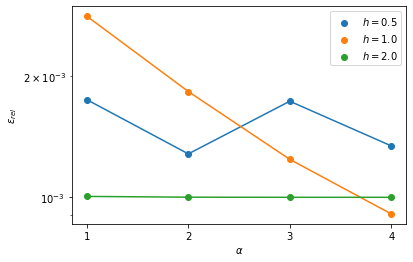

In [36]:
# Exact energies for fields 0.5,1,2
E_true = np.array([-21.270888306919346,-25.490989686,-42.54177661383856])
fields = [0.5,1,2]
root = "data/ES_ISING_"
center = "_20_"
tail = "_4000.txt"

prec = []
alpha = np.array(range(1,5))

for h in fields:
    temp = []
    for a in alpha:
        file = root+str(h)+center+str(a)+tail
        E = np.loadtxt(file)
        E_av = sum(E[2999::])/1000
        e_rel = abs((E_av-E_true[int(floor(h))])/E_true[int(floor(h))])
        temp.append(e_rel)
        print(e_rel, file)
    prec.append(temp)
    
prec = np.array(prec)
plt.ylabel("$\\epsilon_{rel}$")
plt.xlabel("$\\alpha$")
plt.yscale("log")
xticks = range(1,5)
plt.xticks(xticks)

plt.scatter(alpha, prec[0], label="$h = 0.5$")
plt.plot(alpha, prec[0])
plt.scatter(alpha, prec[1], label="$h = 1.0$")
plt.plot(alpha, prec[1])
plt.scatter(alpha, prec[2], label="$h = 2.0$")
plt.plot(alpha, prec[2])
plt.legend()

plt.savefig("precision.png")
plt.plot()

# Feature detector

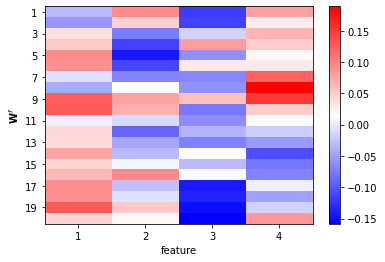

In [3]:
N_iter = 1000
Nv = 20
alpha = 4
W = []

file = open("data/WS_ISING_0_20_4_1000.txt")

for i in range(Nv):
    line = file.readline().split()
    vis = []
    for j in range(alpha):
        t = literal_eval(line[j])
        b = complex(t[0], t[1])
        vis.append(b)
    W.append(vis)

W_real = np.array(W).real
W_imag = np.array(W).imag

xticks = range(alpha)
yticks = range(0,Nv,2)
plt.imshow(W_real, cmap="bwr", aspect="auto")
plt.xticks(xticks, labels=range(1,alpha+1))
plt.yticks(yticks, labels = range(1,Nv+1,2))
plt.xlabel("feature")
plt.ylabel("$\\mathbf{W}^f$")
plt.colorbar()
plt.savefig("FS_ISING_0_20_4_1000.png")
plt.show()

# Heisenberg model

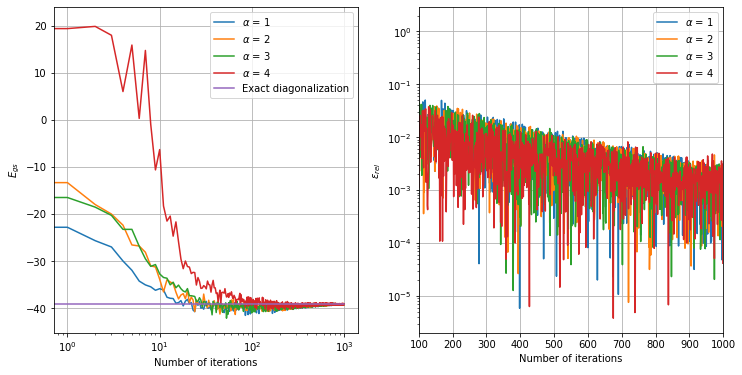

In [37]:
Nv = 22
model = 0
h = 2
steps = 1000
#lr  =max( 0.01*0.95**step,0.001)


# Load energies
E1 = np.loadtxt("data/ES_HEISENBERG_22_1_1000.txt")
E2 = np.loadtxt("data/ES_HEISENBERG_22_2_1000.txt")
E3 = np.loadtxt("data/ES_HEISENBERG_22_3_1000.txt")
E4 = np.loadtxt("data/ES_HEISENBERG_22_4_1000.txt")


E_true =np.array([-39.14752260706274]*steps)
x = list(range(steps))

### Printing 

fig, ax = plt.subplots(1,2,figsize=(12,6))
# ax[0]
ax[0].set_ylabel("$E_{gs}$")
ax[0].set_xlabel("Number of iterations")
ax[0].set_xscale("log")


ax[0].plot(x,  E1, label = "$\\alpha$ = 1")
ax[0].plot(x,  E2, label = "$\\alpha$ = 2")
ax[0].plot(x,  E3, label = "$\\alpha$ = 3")
ax[0].plot(x,  E4, label = "$\\alpha$ = 4")
ax[0].plot(x, E_true, label = "Exact diagonalization")

ax[0].legend()
ax[0].grid(b=True)


# ax[1]

ax[1].set_xlabel("Number of iterations")
#ax[1].set_xscale("log")
ax[1].set_ylabel("$\\epsilon_{rel}$")
ax[1].set_yscale("log")
#ax[1].set_ylim(10**(-7))
ax[1].set_xlim(10**2,10**3)


ax[1].plot(x,  abs((E1-E_true)/E_true), label = "$\\alpha$ = 1")
ax[1].plot(x,  abs((E2-E_true)/E_true), label = "$\\alpha$ = 2")
ax[1].plot(x,  abs((E3-E_true)/E_true), label = "$\\alpha$ = 3")
ax[1].plot(x,  abs((E4-E_true)/E_true), label = "$\\alpha$ = 4")


ax[1].legend()
ax[1].grid(b=True)



fig.savefig("Figure_ES_HEISENBERG_22_1000.png")
plt.show()


# Compare diagonalization time

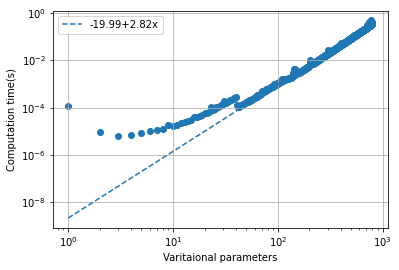

In [43]:
# Load data
par = np.loadtxt("data/diagonalization.txt")
par = par.T



# Define the fit function
def f(x,a,b):
	return a+b*x

# Linear fit
fit_rbm = fit(f, log(par[0][50::]), log(par[1][50::]))[0]


# Plot
plt.ylabel("Computation time(s)")
plt.xlabel("Varitaional parameters")
plt.loglog()

plt.scatter(par[0],par[1])
plt.plot(par[0], exp(f(log(par[0]),fit_rbm[0], fit_rbm[1])),'--', label=str(round(fit_rbm[0],2))+"+"+str(round(fit_rbm[1],2))+"x")


plt.legend()
plt.grid(b=True)



plt.show()